In [1]:
import os, io
from google.cloud import vision_v1 as vision
from google.cloud.vision_v1 import types
import pandas as pd
import cv2
import numpy as np
import json
import re
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw, ImageFont
from enum import Enum
from termcolor import colored
%matplotlib inline

os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = r'Demz_vision_API_token.json'

In [2]:
# Path to the rc1
rc1_1 = 'rc1-1.jpg'
rc1_2 = 'rc1-2.jpg'
FOLDER_PATH = 'C:\\Users\\USER\\Desktop\\NEW_DEMZ\\OCR\OCR_Works\\Google\\rc1\\images'

In [3]:
# Google API client
client = vision.ImageAnnotatorClient()

In [4]:
# Open and Read contents on the documents
with io.open(os.path.join(FOLDER_PATH, rc1_1), 'rb') as image_file1:
        content = image_file1.read()
content_image = types.Image(content=content) # Reading the Image Content
rc1_response = client.text_detection(image=content_image) # Text Detection  
rc1_texts = rc1_response.text_annotations # Text Response

# face detection
response_face = client.face_detection(image=content_image)
faceAnnotations = response_face.face_annotations


In [5]:
def draw_boxes(image, bounds,faceAnnotations, color,width=2):
    image = Image.open(image)
#     image = resize_Image(img)
    draw = ImageDraw.Draw(image)
    for text in bounds:
        draw.line([
            text.bounding_poly.vertices[0].x, text.bounding_poly.vertices[0].y, # left
            text.bounding_poly.vertices[1].x, text.bounding_poly.vertices[1].y, # top
            text.bounding_poly.vertices[2].x, text.bounding_poly.vertices[2].y, # right
            text.bounding_poly.vertices[3].x, text.bounding_poly.vertices[3].y, # bootom
            text.bounding_poly.vertices[0].x, text.bounding_poly.vertices[0].y],fill=color, width=width)
        txt=text.description
        size = 13
        font=ImageFont.truetype("fonts/arial.ttf",size)
        
#         print('SIZE = ', size)
        draw.text((text.bounding_poly.vertices[0].x, text.bounding_poly.vertices[3].y), txt, font=font, fill="#000")
    try:
        for face in faceAnnotations:
            draw.line([
                face.bounding_poly.vertices[0].x, face.bounding_poly.vertices[0].y,
                face.bounding_poly.vertices[1].x, face.bounding_poly.vertices[1].y,
                face.bounding_poly.vertices[2].x, face.bounding_poly.vertices[2].y,
                face.bounding_poly.vertices[3].x, face.bounding_poly.vertices[3].y,
                face.bounding_poly.vertices[0].x, face.bounding_poly.vertices[0].y],fill='yellow', width=width)
            txt='Face'
            size = 13
            font=ImageFont.truetype("fonts/arial.ttf",size)
            draw.text((face.bounding_poly.vertices[0].x, face.bounding_poly.vertices[3].y), txt, font=font, fill="#000")
    #     image.save('output4.jpg', 'JPEG')
    except:
        pass
    return image

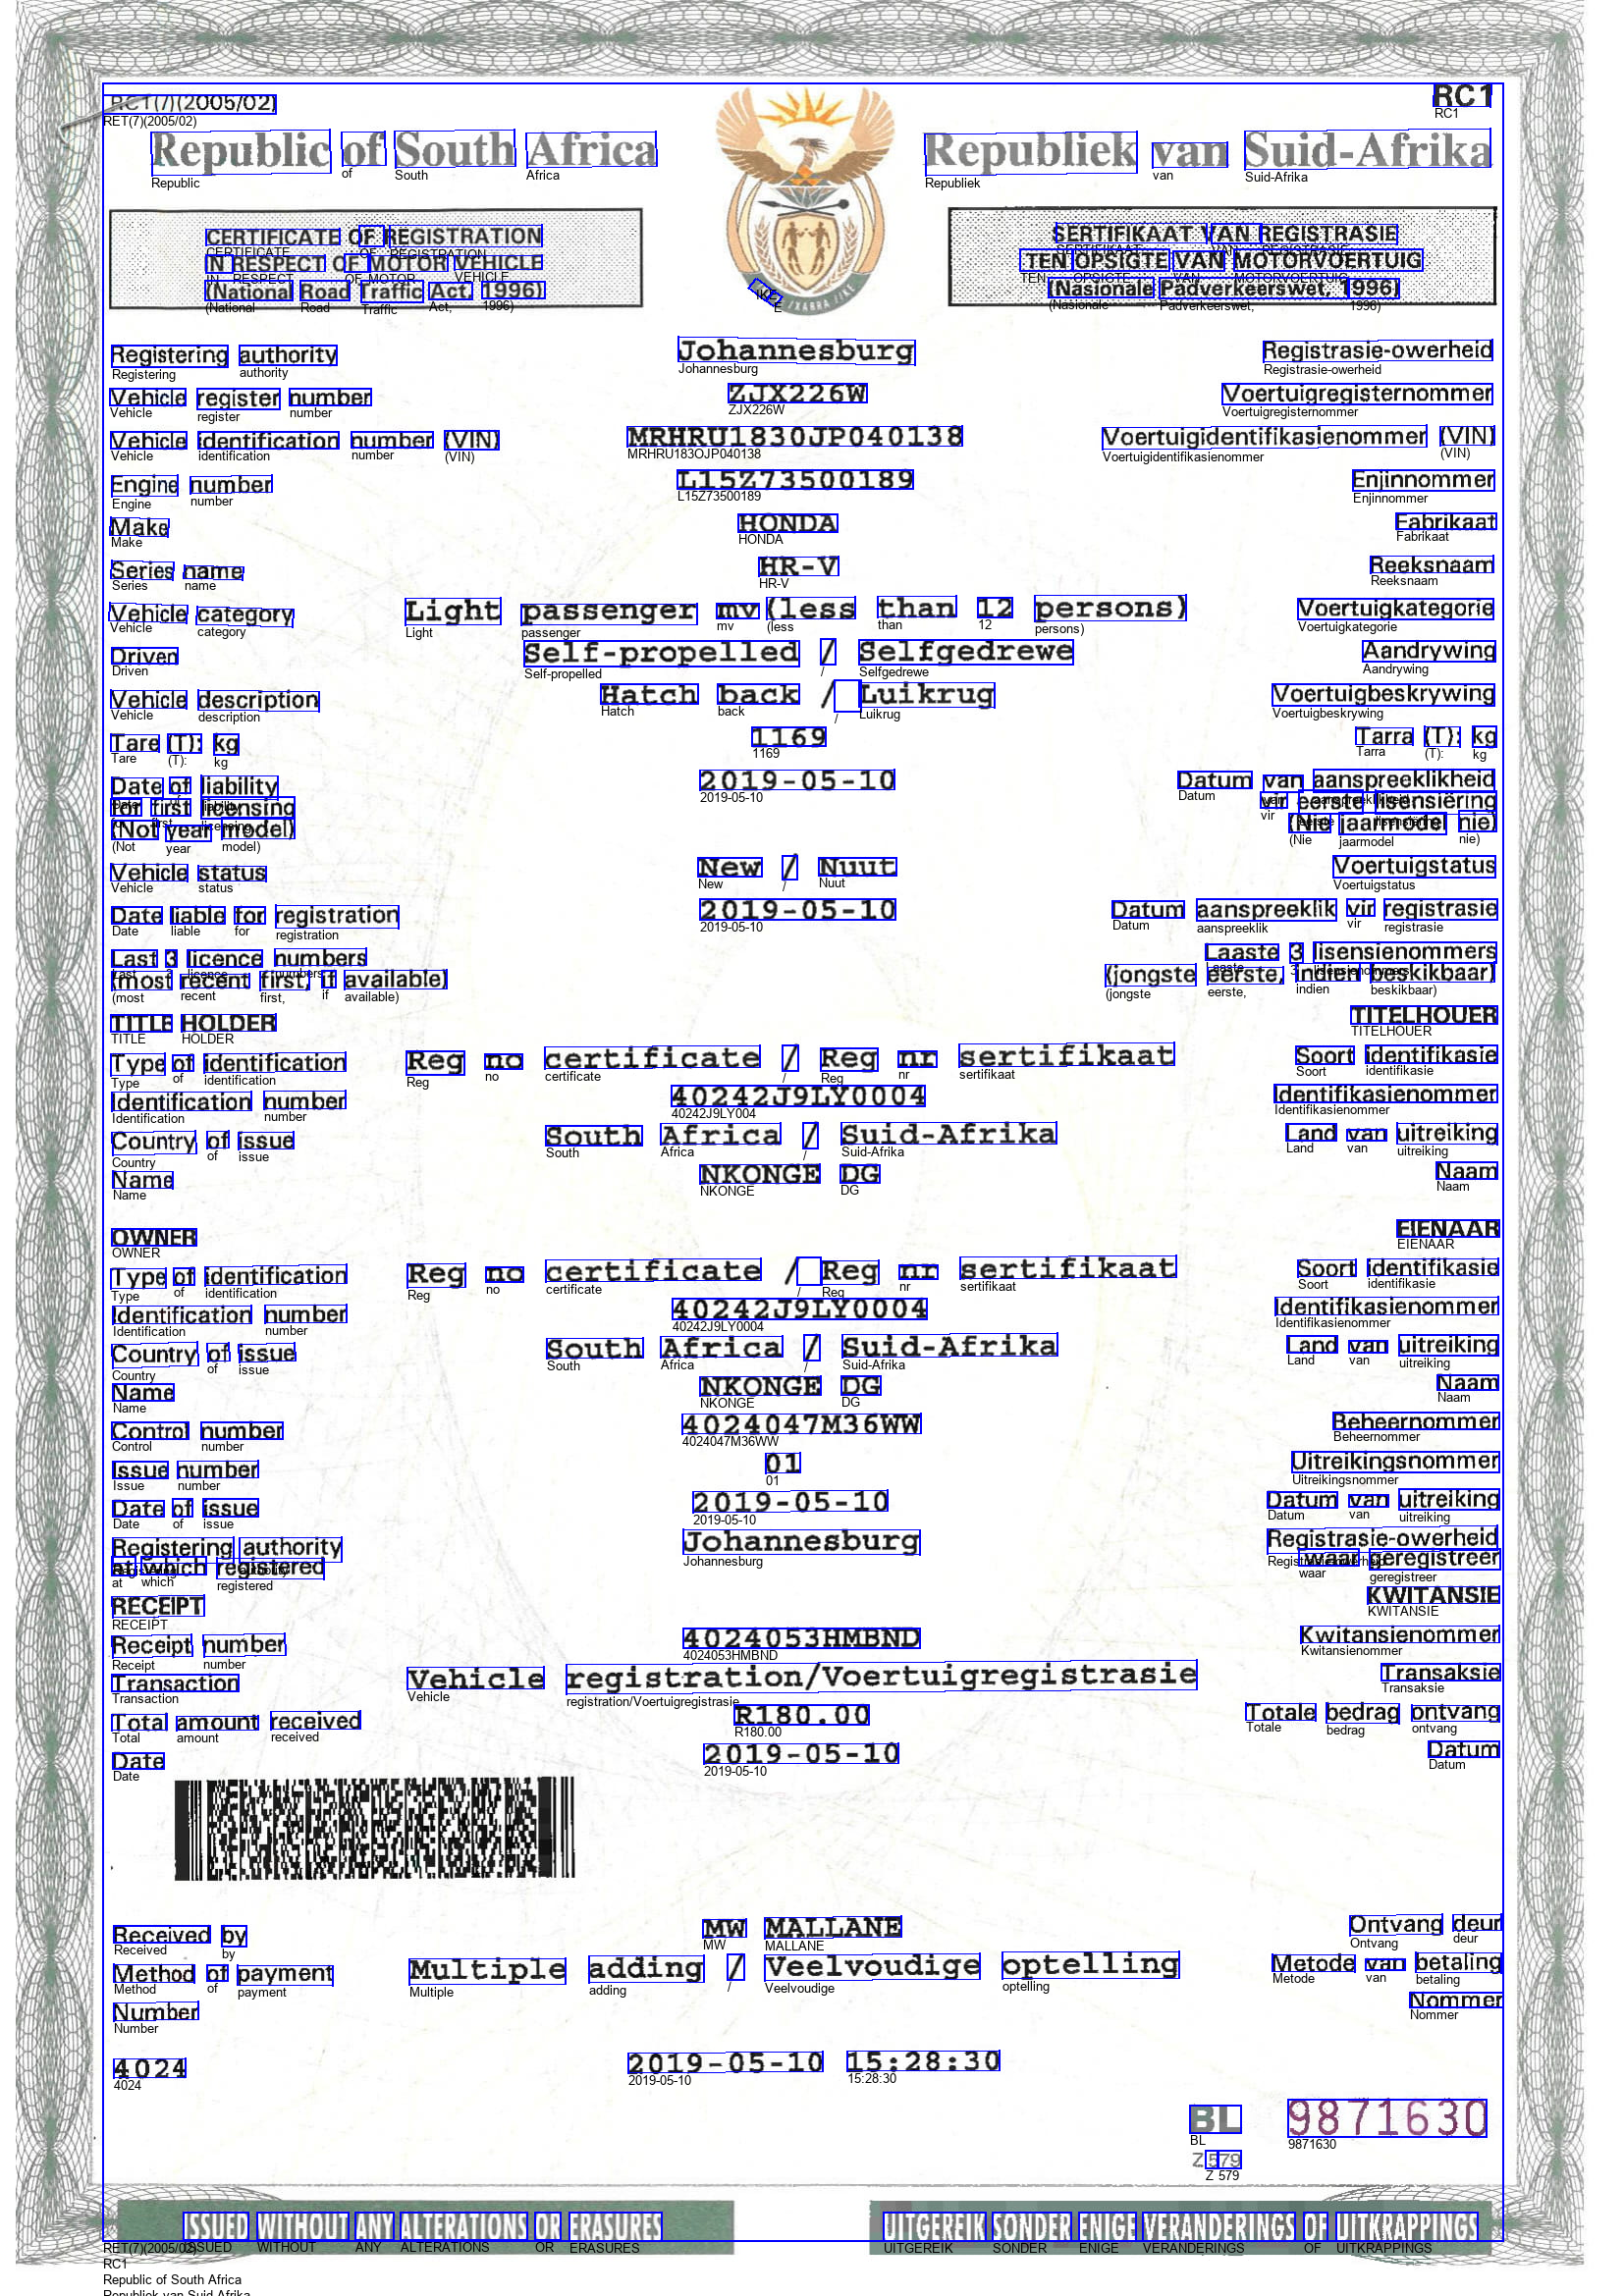

In [9]:
draw_boxes(os.path.join(FOLDER_PATH, rc1_1),rc1_texts, faceAnnotations, 'blue')

In [7]:
# items = []
# lines = {}

# for text in rc1_response.text_annotations[1:]:
#     top_x_axis = text.bounding_poly.vertices[0].x
#     top_y_axis = text.bounding_poly.vertices[0].y
#     bottom_y_axis = text.bounding_poly.vertices[3].y

#     if top_y_axis not in lines:
#         lines[top_y_axis] = [(top_y_axis, bottom_y_axis), []]

#     for s_top_y_axis, s_item in lines.items():
#         if top_y_axis < s_item[0][1]:
#             lines[s_top_y_axis][1].append((top_x_axis, text.description))
#             break

# for _, item in lines.items():
#     if item[1]:
#         words = sorted(item[1], key=lambda t: t[0])
#         items.append((item[0], ' '.join([word for _, word in words]), words))



In [12]:
items = []
lines = {}

for text in rc1_response.text_annotations[1:]:
    top_x_axis = text.bounding_poly.vertices[0].x
    top_y_axis = text.bounding_poly.vertices[0].y
    bottom_y_axis = text.bounding_poly.vertices[3].y

    if top_y_axis not in lines:
        lines[top_y_axis] = [(top_y_axis, bottom_y_axis), []]

    for s_top_y_axis, s_item in lines.items():
        if top_y_axis < s_item[0][1]:
            lines[s_top_y_axis][1].append((top_x_axis, text.description))
            break

for _, item in lines.items():
    if item[1]:
#         words = sorted(item[1], key=lambda t: t[0])
        words = item[1]
        items.append((item[0], ' '.join([word for _, word in words]), words))

print(items)

[((96, 116), 'RET(7)(2005/02) RC1', [(105, 'RET(7)(2005/02)'), (1461, 'RC1')]), ((134, 179), 'Republic of South Africa Republiek van Suid-Afrika', [(154, 'Republic'), (348, 'of'), (402, 'South'), (536, 'Africa'), (942, 'Republiek'), (1174, 'van'), (1268, 'Suid-Afrika')]), ((233, 250), 'CERTIFICATE OF REGISTRATION SERTIFIKAAT VAN REGISTRASIE', [(210, 'CERTIFICATE'), (366, 'OF'), (397, 'REGISTRATION'), (1076, 'SERTIFIKAAT'), (1234, 'VAN'), (1285, 'REGISTRASIE')]), ((259, 278), 'IN RESPECT OF MOTOR VEHICLE TEN OPSIGTE VAN MOTORVOERTUIG', [(210, 'IN'), (237, 'RESPECT'), (351, 'OF'), (375, 'MOTOR'), (463, 'VEHICLE'), (1039, 'TEN'), (1093, 'OPSIGTE'), (1195, 'VAN'), (1257, 'MOTORVOERTUIG')]), ((285, 306), '(National Road Traffic Act, 1996) (Nasionale Padverkeerswet, 1996) IKE E', [(209, '(National'), (306, 'Road'), (368, 'Traffic'), (437, 'Act,'), (491, '1996)'), (1068, '(Nasionale'), (1181, 'Padverkeerswet,'), (1374, '1996)'), (770, 'IKE'), (788, 'E')]), ((351, 374), 'Registering authority 

In [16]:
for i in items:
    print(i[1])

RET(7)(2005/02) RC1
Republic of South Africa Republiek van Suid-Afrika
CERTIFICATE OF REGISTRATION SERTIFIKAAT VAN REGISTRASIE
IN RESPECT OF MOTOR VEHICLE TEN OPSIGTE VAN MOTORVOERTUIG
(National Road Traffic Act, 1996) (Nasionale Padverkeerswet, 1996) IKE E
Registering authority Johannesburg Registrasie-owerheid
Vehicle register number ZJX226W Voertuigregisternommer
Vehicle identification number (VIN) MRHRU183OJP040138 Voertuigidentifikasienommer (VIN)
Engine number L15Z73500189 Enjinnommer
Make HONDA Fabrikaat
Series name HR-V Reeksnaam
Light passenger mv (less than 12 persons) Vehicle category Voertuigkategorie
Self-propelled / Selfgedrewe Driven Aandrywing
Hatch back / Luikrug Vehicle description Voertuigbeskrywing
Tare (T): kg 1169 Tarra (T): kg
Datum van aanspreeklikheid 2019-05-10 Date of liability
vir eerste lisensiëring
for first licensing
(Nie jaarmodel nie)
(Not year model)
Vehicle status New / Nuut Voertuigstatus
Date liable for registration 2019-05-10 Datum aanspreeklik vir

In [13]:
new_content = []
for i in range(len(items) - 1):
#     print(abs(items[i][2][0][0] - items[i +1][2][0][0]))
    if abs(items[i][2][0][0] - items[i +1][2][0][0]) < 1:
        new_content.append([])
        new_content.append(items[i][2])
    elif abs(items[i][2][0][0] - items[i -1][2][0][0]) > 100:
        new_content.append(items[i][2])
    else:
        new_content.append([])
        new_content.append(items[i][2])



In [14]:
for i in new_content:
    print(i)

[]
[(105, 'RET(7)(2005/02)'), (1461, 'RC1')]
[]
[(154, 'Republic'), (348, 'of'), (402, 'South'), (536, 'Africa'), (942, 'Republiek'), (1174, 'van'), (1268, 'Suid-Afrika')]
[]
[(210, 'CERTIFICATE'), (366, 'OF'), (397, 'REGISTRATION'), (1076, 'SERTIFIKAAT'), (1234, 'VAN'), (1285, 'REGISTRASIE')]
[]
[(210, 'IN'), (237, 'RESPECT'), (351, 'OF'), (375, 'MOTOR'), (463, 'VEHICLE'), (1039, 'TEN'), (1093, 'OPSIGTE'), (1195, 'VAN'), (1257, 'MOTORVOERTUIG')]
[]
[(209, '(National'), (306, 'Road'), (368, 'Traffic'), (437, 'Act,'), (491, '1996)'), (1068, '(Nasionale'), (1181, 'Padverkeerswet,'), (1374, '1996)'), (770, 'IKE'), (788, 'E')]
[]
[(114, 'Registering'), (244, 'authority'), (691, 'Johannesburg'), (1287, 'Registrasie-owerheid')]
[]
[(112, 'Vehicle'), (201, 'register'), (295, 'number'), (742, 'ZJX226W'), (1245, 'Voertuigregisternommer')]
[]
[(113, 'Vehicle'), (202, 'identification'), (358, 'number'), (453, '(VIN)'), (639, 'MRHRU183OJP040138'), (1123, 'Voertuigidentifikasienommer'), (1467, '(VI